# Trabalho 2 - 2º Bimestre

**Integrantes**: 
- Wesley Júnior (020321)
- Lucas Faria (019790)

Análise de sentimentos com um conjunto de dados com 50.000 avaliações de filmes do IMDB, categorizadas como positivas ou negativas.

**1º Instalar as bibliotecas**

In [22]:
!pip install pandas nltk matplotlib

**2º Importar as bibliotecas**

In [23]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

**3º Baixar os recursos do NLTK**

In [24]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

**4º Carregar o conjunto de dados do IMDB Reviews**

In [25]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'
dataset_path = 'aclImdb_v1.tar.gz'

**5º Baixar e extrair o dataset**

In [26]:
!wget $url -O $dataset_path
!tar -xzf $dataset_path

--2024-06-12 20:56:02--  https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  8.91MB/s    in 19s     

2024-06-12 20:56:22 (4.12 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



**6º Criar função para carregar as avaliações em um dt**

In [27]:
def load_imdb_reviews(path):
    import os
    import pandas as pd

    data = {'review': [], 'sentiment': []}

    for sentiment in ['pos', 'neg']:
        dir_path = os.path.join(path, 'train', sentiment)
        
        for filename in os.listdir(dir_path):
            if filename.endswith('.txt'):
                with open(os.path.join(dir_path, filename), 'r', encoding='utf-8') as f:
                    data['review'].append(f.read())
                    data['sentiment'].append(sentiment)

    return pd.DataFrame(data)

**7º Carregar as avaliações**

In [28]:
df = load_imdb_reviews('aclImdb')

**8º Tokenização dos textos**

In [29]:
df['tokens'] = df['review'].apply(word_tokenize)

**9º Remover stop words**

In [30]:
stop_words = set(stopwords.words('english'))
df['filtered_tokens'] = df['tokens'].apply(lambda tokens: [token for token in tokens if token.lower() not in stop_words and token.isalpha()])

**10º Criar função para juntar tokens novamente em um texto limpo**

In [31]:
df['cleaned_review'] = df['filtered_tokens'].apply(lambda tokens: ' '.join(tokens))

**11º Utilizar a biblioteca VADER para análise de sentimentos**

In [32]:
sid = SentimentIntensityAnalyzer()

**12º Analisar os sentimentos dos textos**

In [33]:
df['sentiment_scores'] = df['cleaned_review'].apply(lambda review: sid.polarity_scores(review))

**13º Extrair as pontuações de sentimento**

In [34]:
df['compound'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['compound'])
df['neg'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neg'])
df['neu'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['neu'])
df['pos'] = df['sentiment_scores'].apply(lambda score_dict: score_dict['pos'])

**14º Visualizar as primeiras linhas com as pontuações de sentimento**

In [35]:
print(df.head())

                                              review sentiment  \
0  Sam Kleinman (Peter Falk) comes to his son's p...       pos   
1  The combination of the superb black and white ...       pos   
2  Rock solid giallo from a master filmmaker of t...       pos   
3  A very refreshing story, the life of a parrot ...       pos   
4  I am beginning to see a very consistent patter...       pos   

                                              tokens  \
0  [Sam, Kleinman, (, Peter, Falk, ), comes, to, ...   
1  [The, combination, of, the, superb, black, and...   
2  [Rock, solid, giallo, from, a, master, filmmak...   
3  [A, very, refreshing, story, ,, the, life, of,...   
4  [I, am, beginning, to, see, a, very, consisten...   

                                     filtered_tokens  \
0  [Sam, Kleinman, Peter, Falk, comes, son, place...   
1  [combination, superb, black, white, photograph...   
2  [Rock, solid, giallo, master, filmmaker, genre...   
3  [refreshing, story, life, parrot, intel

**15º Visualizar a distribuição dos sentimentos graficamente**

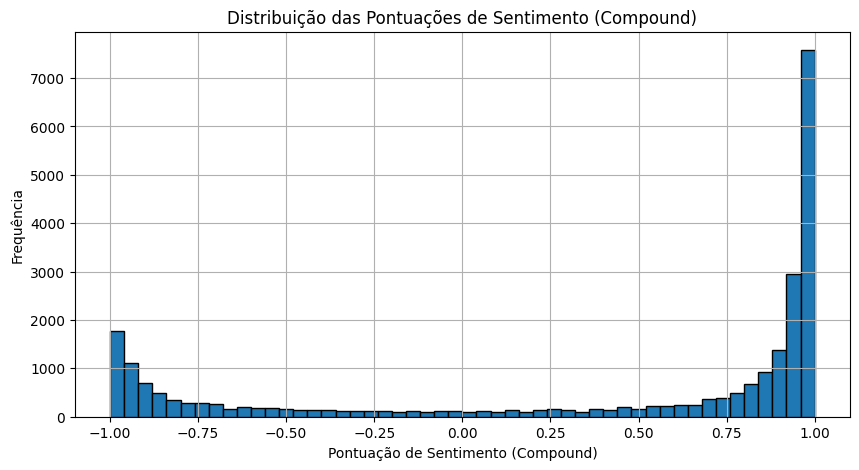

In [36]:
plt.figure(figsize=(10, 5))
df['compound'].hist(bins=50, edgecolor='black')
plt.title('Distribuição das Pontuações de Sentimento (Compound)')
plt.xlabel('Pontuação de Sentimento (Compound)')
plt.ylabel('Frequência')
plt.show()

**16º Análise descritiva das pontuações de sentimento**

In [37]:
print("Estatísticas Descritivas das Pontuações de Sentimento:")
print(df[['compound', 'neg', 'neu', 'pos']].describe())

Estatísticas Descritivas das Pontuações de Sentimento:
           compound           neg           neu           pos
count  25000.000000  25000.000000  25000.000000  25000.000000
mean       0.368160      0.144835      0.621130      0.234031
std        0.767993      0.087391      0.091191      0.097160
min       -0.999400      0.000000      0.197000      0.000000
25%       -0.440400      0.081000      0.563000      0.166000
50%        0.855500      0.136000      0.624000      0.223000
75%        0.970500      0.198000      0.682000      0.291000
max        0.999800      0.638000      1.000000      0.750000


**17º Contar o número de avaliações positivas e negativas com base na computação "compound"**

In [38]:
df['predicted_sentiment'] = df['compound'].apply(lambda score: 'pos' if score >= 0 else 'neg')
print("Contagem de Avaliações Preditas como Positivas e Negativas:")
print(df['predicted_sentiment'].value_counts())

Contagem de Avaliações Preditas como Positivas e Negativas:
predicted_sentiment
pos    17465
neg     7535
Name: count, dtype: int64


**18º Exibir algumas avaliações e suas pontuações de sentimento (mostrando apenas os primeiros caracteres do review)**

In [40]:
for index, row in df.sample(5).iterrows():
    print(f"Review: {row['review'][:100]}...")
    print(f"Sentimento Predito: {row['predicted_sentiment']}")
    print(f"Pontuações: {row['sentiment_scores']}")
    print("-" * 50)

Review: ....as to the level of wit on which this comedy operates. Barely even reaching feature length, "Can ...
Sentimento Predito: pos
Pontuações: {'neg': 0.112, 'neu': 0.558, 'pos': 0.331, 'compound': 0.9754}
--------------------------------------------------
Review: It took us a couple of episodes to "get into" Dark Angel as a story and a series, since we were tran...
Sentimento Predito: neg
Pontuações: {'neg': 0.16, 'neu': 0.682, 'pos': 0.158, 'compound': -0.0754}
--------------------------------------------------
Review: "Heartland" is a wonderful depiction of what it was really like to live on the frontier. The hard wo...
Sentimento Predito: pos
Pontuações: {'neg': 0.066, 'neu': 0.618, 'pos': 0.316, 'compound': 0.9738}
--------------------------------------------------
Review: The trick to creating a good, solid mystery story is as much a matter of timing as its about plot co...
Sentimento Predito: pos
Pontuações: {'neg': 0.139, 'neu': 0.591, 'pos': 0.269, 'compound': 0.9958}
---